# Gravitational Waves: Theory and Simulation

## Introduction

Gravitational waves are ripples in the fabric of spacetime, predicted by Albert Einstein's General Theory of Relativity in 1916 and first directly detected by LIGO in September 2015. These waves are generated by accelerating masses and propagate at the speed of light, carrying information about their cataclysmic origins.

## Theoretical Background

### The Weak-Field Approximation

In the weak-field limit, the spacetime metric can be written as a perturbation of flat Minkowski spacetime:

$$g_{\mu\nu} = \eta_{\mu\nu} + h_{\mu\nu}$$

where $\eta_{\mu\nu}$ is the Minkowski metric and $|h_{\mu\nu}| \ll 1$ is the metric perturbation.

### The Wave Equation

In the transverse-traceless (TT) gauge, far from the source, the linearized Einstein field equations reduce to a wave equation:

$$\Box \bar{h}_{\mu\nu} = -\frac{16\pi G}{c^4} T_{\mu\nu}$$

In vacuum ($T_{\mu\nu} = 0$), this becomes:

$$\left( \nabla^2 - \frac{1}{c^2}\frac{\partial^2}{\partial t^2} \right) h_{\mu\nu}^{TT} = 0$$

### Gravitational Wave Polarizations

Gravitational waves have two independent polarization states, denoted $h_+$ (plus) and $h_\times$ (cross). For a wave propagating in the $z$-direction:

$$h_{\mu\nu}^{TT} = \begin{pmatrix} 0 & 0 & 0 & 0 \\ 0 & h_+ & h_\times & 0 \\ 0 & h_\times & -h_+ & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix} \cos(\omega t - kz)$$

### Quadrupole Formula

The gravitational wave strain at distance $r$ from a source is given by the quadrupole formula:

$$h_{ij}^{TT} = \frac{2G}{c^4 r} \ddot{Q}_{ij}^{TT}$$

where $Q_{ij}$ is the mass quadrupole moment tensor:

$$Q_{ij} = \int \rho(\mathbf{x}) \left( x_i x_j - \frac{1}{3}\delta_{ij} r^2 \right) d^3x$$

### Binary System Waveform

For a compact binary system (e.g., two black holes or neutron stars) in circular orbit, the gravitational wave strain takes the form:

$$h_+(t) = \frac{4}{r} \left( \frac{G\mathcal{M}}{c^2} \right)^{5/3} \left( \frac{\pi f(t)}{c} \right)^{2/3} \frac{1 + \cos^2(\iota)}{2} \cos(\Phi(t))$$

$$h_\times(t) = \frac{4}{r} \left( \frac{G\mathcal{M}}{c^2} \right)^{5/3} \left( \frac{\pi f(t)}{c} \right)^{2/3} \cos(\iota) \sin(\Phi(t))$$

where $\mathcal{M} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}}$ is the chirp mass, $f(t)$ is the instantaneous frequency, $\iota$ is the inclination angle, and $\Phi(t)$ is the orbital phase.

### Chirp Signal

As the binary inspirals, it loses energy to gravitational radiation, causing the orbital frequency to increase ("chirp"):

$$\frac{df}{dt} = \frac{96}{5} \pi^{8/3} \left( \frac{G\mathcal{M}}{c^3} \right)^{5/3} f^{11/3}$$

The characteristic "chirp" frequency evolution is:

$$f(t) = \frac{1}{\pi} \left( \frac{5}{256} \frac{c^3}{G\mathcal{M}} \right)^{3/8} (t_c - t)^{-3/8}$$

where $t_c$ is the coalescence time.

## Numerical Simulation

We will simulate the gravitational wave signal from a binary black hole inspiral, similar to the first detection event GW150914.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Physical constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 2.998e8      # Speed of light (m/s)
M_sun = 1.989e30 # Solar mass (kg)
Mpc = 3.086e22   # Megaparsec in meters

print("Physical constants loaded successfully.")
print(f"G = {G:.4e} m^3 kg^-1 s^-2")
print(f"c = {c:.3e} m/s")
print(f"M_sun = {M_sun:.3e} kg")

Physical constants loaded successfully.
G = 6.6743e-11 m^3 kg^-1 s^-2
c = 2.998e+08 m/s
M_sun = 1.989e+30 kg


In [2]:
def chirp_mass(m1, m2):
    """
    Calculate the chirp mass of a binary system.
    
    Parameters:
    -----------
    m1, m2 : float
        Component masses in kg
    
    Returns:
    --------
    M_chirp : float
        Chirp mass in kg
    """
    return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)


def gravitational_wave_frequency(t, t_c, M_chirp):
    """
    Calculate the instantaneous gravitational wave frequency during inspiral.
    
    Parameters:
    -----------
    t : array
        Time array in seconds
    t_c : float
        Coalescence time in seconds
    M_chirp : float
        Chirp mass in kg
    
    Returns:
    --------
    f : array
        Frequency array in Hz
    """
    tau = t_c - t
    tau = np.maximum(tau, 1e-10)  # Avoid division by zero
    
    prefactor = (5/256)**(3/8) * (c**3 / (G * M_chirp))**(5/8)
    f = (1/np.pi) * prefactor * tau**(-3/8)
    
    return f


def gravitational_wave_phase(t, t_c, M_chirp):
    """
    Calculate the gravitational wave phase during inspiral.
    
    Parameters:
    -----------
    t : array
        Time array in seconds
    t_c : float
        Coalescence time in seconds
    M_chirp : float
        Chirp mass in kg
    
    Returns:
    --------
    phi : array
        Phase array in radians
    """
    tau = t_c - t
    tau = np.maximum(tau, 1e-10)
    
    phi_c = 0  # Reference phase at coalescence
    prefactor = (c**3 / (G * M_chirp))**(5/8)
    phi = phi_c - 2 * (5 * G * M_chirp / c**3)**(-5/8) * tau**(5/8)
    
    return phi


def gravitational_wave_strain(t, t_c, M_chirp, r, iota=0):
    """
    Calculate the gravitational wave strain h_+ and h_x.
    
    Parameters:
    -----------
    t : array
        Time array in seconds
    t_c : float
        Coalescence time in seconds
    M_chirp : float
        Chirp mass in kg
    r : float
        Distance to source in meters
    iota : float
        Inclination angle in radians (default: face-on)
    
    Returns:
    --------
    h_plus, h_cross : arrays
        Strain amplitudes for plus and cross polarizations
    """
    f = gravitational_wave_frequency(t, t_c, M_chirp)
    phi = gravitational_wave_phase(t, t_c, M_chirp)
    
    # Amplitude prefactor
    amplitude = (4/r) * (G * M_chirp / c**2)**(5/3) * (np.pi * f / c)**(2/3)
    
    # Polarization patterns
    h_plus = amplitude * (1 + np.cos(iota)**2) / 2 * np.cos(phi)
    h_cross = amplitude * np.cos(iota) * np.sin(phi)
    
    return h_plus, h_cross, f, phi

print("Waveform functions defined.")

Waveform functions defined.


In [3]:
# Binary system parameters (similar to GW150914)
m1 = 36 * M_sun  # First black hole mass
m2 = 29 * M_sun  # Second black hole mass
distance = 410 * Mpc  # Luminosity distance
inclination = np.pi / 6  # Inclination angle (30 degrees)

# Calculate chirp mass
M_c = chirp_mass(m1, m2)
print(f"Binary system parameters:")
print(f"  m1 = {m1/M_sun:.1f} M_sun")
print(f"  m2 = {m2/M_sun:.1f} M_sun")
print(f"  Chirp mass = {M_c/M_sun:.2f} M_sun")
print(f"  Distance = {distance/Mpc:.0f} Mpc")
print(f"  Inclination = {np.degrees(inclination):.1f} degrees")

Binary system parameters:
  m1 = 36.0 M_sun
  m2 = 29.0 M_sun
  Chirp mass = 28.10 M_sun
  Distance = 410 Mpc
  Inclination = 30.0 degrees


In [4]:
# Time array for the inspiral
# We simulate the last ~0.2 seconds before merger
t_coalescence = 0.2  # Coalescence time
dt = 1/4096  # Sample rate matching LIGO (4096 Hz)
t = np.arange(0, t_coalescence - 0.001, dt)

# Generate waveform
h_plus, h_cross, freq, phase = gravitational_wave_strain(
    t, t_coalescence, M_c, distance, inclination
)

# Combined strain (for a single detector with specific antenna pattern)
# Using simplified antenna response
F_plus = 0.5
F_cross = 0.5
h_total = F_plus * h_plus + F_cross * h_cross

print(f"Generated {len(t)} samples over {t[-1]:.3f} seconds")
print(f"Peak strain amplitude: {np.max(np.abs(h_total)):.2e}")
print(f"Frequency range: {freq[0]:.1f} Hz to {freq[-1]:.1f} Hz")

Generated 816 samples over 0.199 seconds
Peak strain amplitude: 1.79e-21
Frequency range: 34.3 Hz to 248.1 Hz


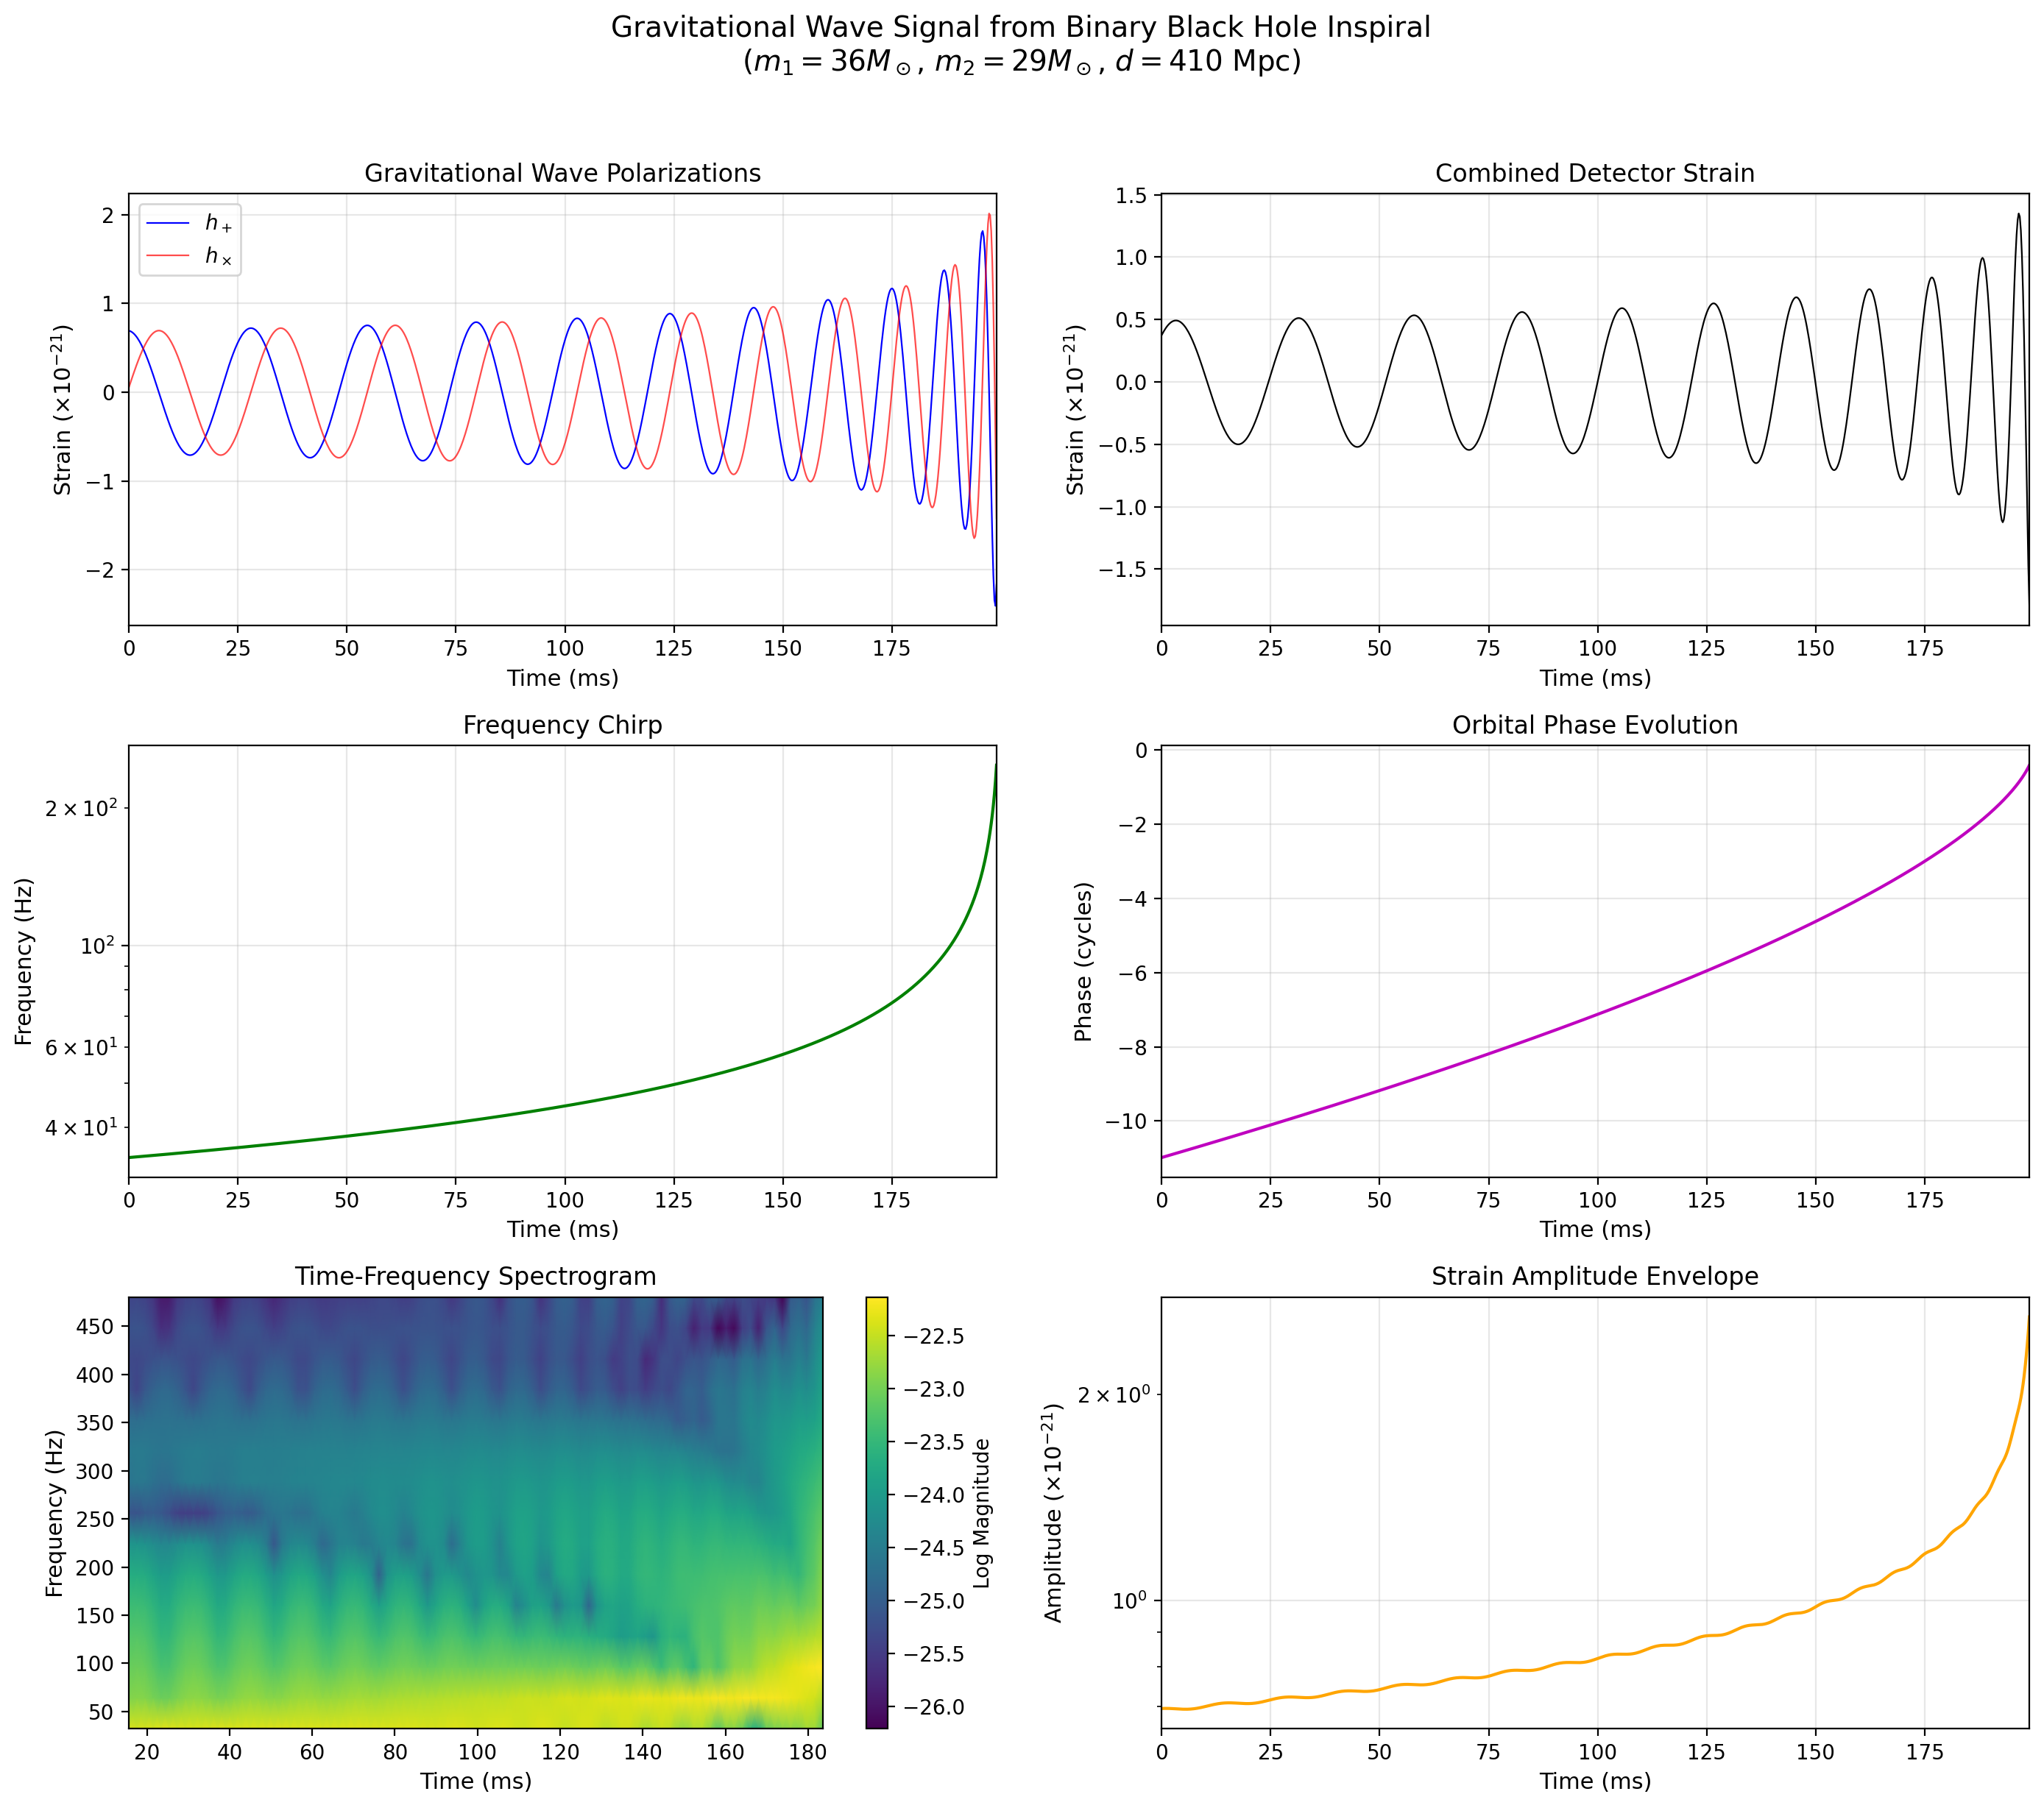


Plot saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 12))

# Plot 1: Time-domain waveform
ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(t * 1000, h_plus * 1e21, 'b-', linewidth=0.8, label=r'$h_+$')
ax1.plot(t * 1000, h_cross * 1e21, 'r-', linewidth=0.8, alpha=0.7, label=r'$h_\times$')
ax1.set_xlabel('Time (ms)', fontsize=11)
ax1.set_ylabel(r'Strain ($\times 10^{-21}$)', fontsize=11)
ax1.set_title('Gravitational Wave Polarizations', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, t[-1]*1000])

# Plot 2: Combined strain (detector signal)
ax2 = fig.add_subplot(3, 2, 2)
ax2.plot(t * 1000, h_total * 1e21, 'k-', linewidth=0.8)
ax2.set_xlabel('Time (ms)', fontsize=11)
ax2.set_ylabel(r'Strain ($\times 10^{-21}$)', fontsize=11)
ax2.set_title('Combined Detector Strain', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, t[-1]*1000])

# Plot 3: Frequency evolution (chirp)
ax3 = fig.add_subplot(3, 2, 3)
ax3.plot(t * 1000, freq, 'g-', linewidth=1.5)
ax3.set_xlabel('Time (ms)', fontsize=11)
ax3.set_ylabel('Frequency (Hz)', fontsize=11)
ax3.set_title('Frequency Chirp', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xlim([0, t[-1]*1000])
ax3.set_yscale('log')

# Plot 4: Phase evolution
ax4 = fig.add_subplot(3, 2, 4)
ax4.plot(t * 1000, phase / (2*np.pi), 'm-', linewidth=1.5)
ax4.set_xlabel('Time (ms)', fontsize=11)
ax4.set_ylabel('Phase (cycles)', fontsize=11)
ax4.set_title('Orbital Phase Evolution', fontsize=12)
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0, t[-1]*1000])

# Plot 5: Time-frequency spectrogram
ax5 = fig.add_subplot(3, 2, 5)
nperseg = 128
noverlap = 120
f_spec, t_spec, Sxx = spectrogram(h_total, fs=1/dt, nperseg=nperseg, 
                                   noverlap=noverlap, mode='magnitude')
# Limit frequency range to 20-500 Hz
freq_mask = (f_spec >= 20) & (f_spec <= 500)
im = ax5.pcolormesh(t_spec * 1000, f_spec[freq_mask], 
                    np.log10(Sxx[freq_mask, :] + 1e-30), 
                    shading='gouraud', cmap='viridis')
ax5.set_xlabel('Time (ms)', fontsize=11)
ax5.set_ylabel('Frequency (Hz)', fontsize=11)
ax5.set_title('Time-Frequency Spectrogram', fontsize=12)
plt.colorbar(im, ax=ax5, label='Log Magnitude')

# Plot 6: Instantaneous amplitude envelope
ax6 = fig.add_subplot(3, 2, 6)
amplitude_envelope = np.sqrt(h_plus**2 + h_cross**2)
ax6.semilogy(t * 1000, amplitude_envelope * 1e21, 'orange', linewidth=1.5)
ax6.set_xlabel('Time (ms)', fontsize=11)
ax6.set_ylabel(r'Amplitude ($\times 10^{-21}$)', fontsize=11)
ax6.set_title('Strain Amplitude Envelope', fontsize=12)
ax6.grid(True, alpha=0.3)
ax6.set_xlim([0, t[-1]*1000])

plt.suptitle('Gravitational Wave Signal from Binary Black Hole Inspiral\n'
             f'($m_1={m1/M_sun:.0f}M_\odot$, $m_2={m2/M_sun:.0f}M_\odot$, '
             f'$d={distance/Mpc:.0f}$ Mpc)', 
             fontsize=14, y=1.02)

plt.tight_layout()
plt.savefig('gravitational_waves_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis and Discussion

### Key Features of the Gravitational Wave Signal

1. **Chirp Behavior**: The frequency increases as the binary system spirals inward, following $f \propto (t_c - t)^{-3/8}$. This distinctive "chirp" signature allows precise measurement of the chirp mass.

2. **Amplitude Growth**: The strain amplitude grows as $h \propto f^{2/3}$, becoming most intense just before merger.

3. **Polarization**: The two polarization states ($h_+$ and $h_\times$) are 90° out of phase and carry complementary information about the source orientation.

4. **Detectability**: The peak strain of $\sim 10^{-21}$ requires extraordinarily sensitive detectors like LIGO/Virgo with kilometer-scale interferometer arms.

### Physical Interpretation

The gravitational wave luminosity of a binary system is:

$$L_{GW} = \frac{32}{5} \frac{c^5}{G} \left( \frac{G\mathcal{M}\omega}{c^3} \right)^{10/3}$$

At merger, the GW150914 system radiated energy at a peak rate of $\sim 3.6 \times 10^{49}$ W, momentarily exceeding the combined electromagnetic luminosity of all stars in the observable universe.

### Applications

- **Standard Sirens**: GW observations provide direct distance measurements, enabling independent Hubble constant determination
- **Strong-Field Gravity Tests**: Probe spacetime in extreme curvature regimes
- **Multi-Messenger Astronomy**: Combined with EM observations (e.g., GW170817)